In [ ]:
import cv2
import numpy as np
import os

# 文件路径
mask_file = '/content/20150919_174151_image1.png'  # 单个掩码文件
image_file = '/content/20150919_17415_image1.png'  # 单个图像文件
label_dir = '/content/labels'  # 标签文件存储路径

os.makedirs(label_dir, exist_ok=True)

# 读取掩码图像
mask = cv2.imread(mask_file, cv2.IMREAD_GRAYSCALE)

# 检测每个苹果的轮廓
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 创建与图像同名的标签文件
label_file_path = os.path.join(label_dir, os.path.basename(image_file).replace('.png', '.txt'))
with open(label_file_path, 'w') as label_file:
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)

        # 归一化边界框坐标
        x_center = (x + w / 2) / mask.shape[1]
        y_center = (y + h / 2) / mask.shape[0]
        width = w / mask.shape[1]
        height = h / mask.shape[0]

        # 写入标签文件
        label_file.write(f"0 {x_center} {y_center} {width} {height}\n")


In [ ]:
import cv2
import numpy as np
import os

# 文件路径
mask_file = '/content/20150919_174151_image1 (1).png'  # 单个掩码文件
image_file = '/content/20150919_174151_image1.png'  # 单个图像文件
label_dir = '/content/labels'  # 标签文件存储路径

# 自动创建 labels 文件夹
os.makedirs(label_dir, exist_ok=True)

# 读取掩码图像
mask = cv2.imread(mask_file, cv2.IMREAD_GRAYSCALE)

# 创建与图像同名的标签文件
label_file_path = os.path.join(label_dir, os.path.basename(image_file).replace('.png', '.txt'))
with open(label_file_path, 'w') as label_file:
    # 遍历每个像素值1-255来检测苹果区域
    for pixel_value in range(1, 256):
        # 找到所有值为当前像素值的点
        y_indices, x_indices = np.where(mask == pixel_value)

        # 检查是否检测到任何苹果区域
        if len(x_indices) > 0 and len(y_indices) > 0:
            # 找到边界框的最小和最大坐标
            x_min, x_max = x_indices.min(), x_indices.max()
            y_min, y_max = y_indices.min(), y_indices.max()

            # 计算边界框中心和尺寸，归一化到 YOLO 格式
            x_center = (x_min + x_max) / 2 / mask.shape[1]
            y_center = (y_min + y_max) / 2 / mask.shape[0]
            width = (x_max - x_min) / mask.shape[1]
            height = (y_max - y_min) / mask.shape[0]

            # 写入标签文件（类别ID假设为0）
            label_file.write(f"0 {x_center} {y_center} {width} {height}\n")

print(f"Labels saved to {label_file_path}")



Labels saved to /content/labels/20150919_174151_image1.txt


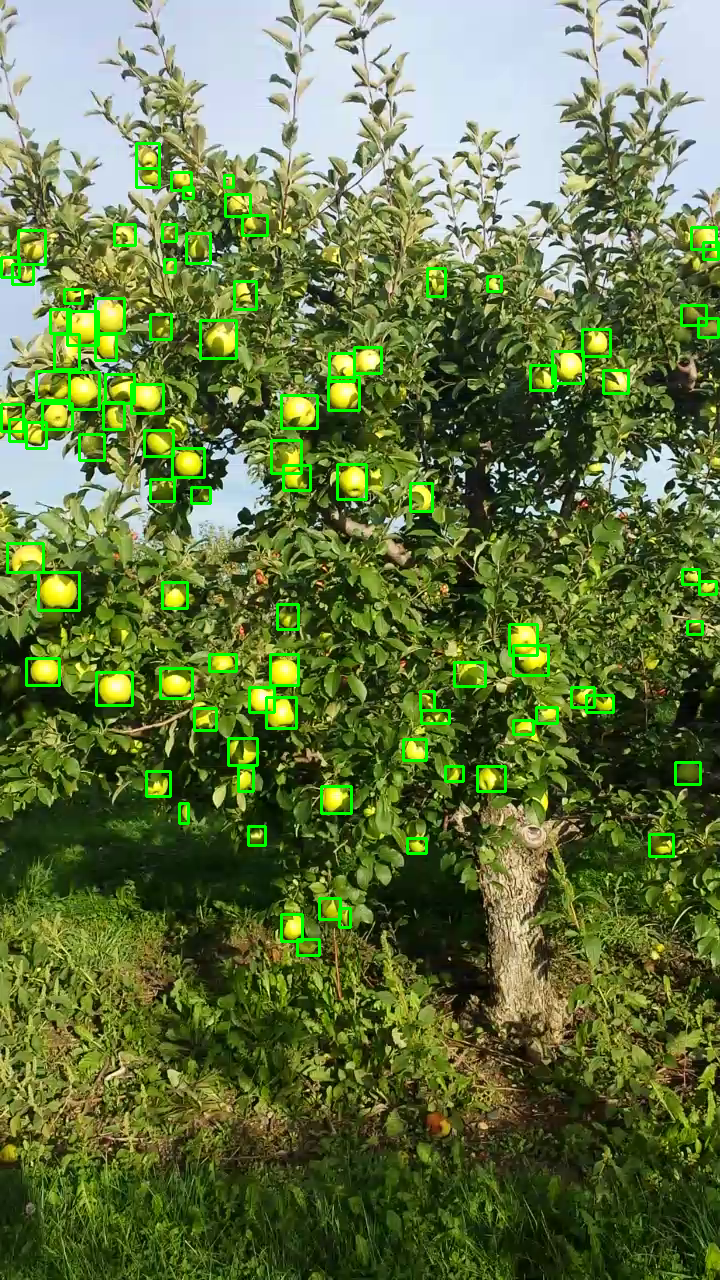

In [ ]:
import cv2
import os

# 文件路径
image_file = '/content/20150919_174151_image1.png'   # 原始图像文件
label_file = '/content/labels/20150919_174151_image1.txt'   # 对应的标签文件

# 读取图像
image = cv2.imread(image_file)

# 获取图像尺寸
height, width = image.shape[:2]

# 打开标签文件并读取每行
with open(label_file, 'r') as file:
    for line in file:
        # 解析标签信息
        class_id, x_center, y_center, box_width, box_height = map(float, line.split())

        # 将归一化坐标转换回图像像素坐标
        x_center = int(x_center * width)
        y_center = int(y_center * height)
        box_width = int(box_width * width)
        box_height = int(box_height * height)

        # 计算左上角和右下角坐标
        top_left = (int(x_center - box_width / 2), int(y_center - box_height / 2))
        bottom_right = (int(x_center + box_width / 2), int(y_center + box_height / 2))

        # 绘制边界框
        cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

# 显示图像
from google.colab.patches import cv2_imshow
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17067, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 17067 (delta 24), reused 27 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17067/17067), 15.69 MiB | 25.02 MiB/s, done.
Resolving deltas: 100% (11718/11718), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.3/896.3 kB 40.9 MB/s eta 0:00:00
